In [239]:
# importing relative packages for eda
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [240]:
# creating variables for the file paths 
movies = "../data/movie_lens_big/movies.csv"
ratings = "../data/movie_lens_big/ratings.csv"

In [241]:
# importing the csv files and creating dataframes
df_movies = pd.read_csv(movies, dtype={"title":"str", "genres":"str", "movieId":"int32"})
df_ratings = pd.read_csv(ratings, dtype={"userId":"int32", "movieId":"int32", "rating":"float32"})

In [242]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int32 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int32(1), object(2)
memory usage: 1.1+ MB


In [243]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int32  
 1   movieId    int32  
 2   rating     float32
 3   timestamp  int64  
dtypes: float32(1), int32(2), int64(1)
memory usage: 529.4 MB


In [244]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [245]:
df_movies["genres"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 58098 entries, 0 to 58097
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
58098 non-null  object
dtypes: object(1)
memory usage: 454.0+ KB


In [246]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [247]:
# dropping userId and timestamp from the dataframe
df_ratings_clean = df_ratings.drop(["userId", "timestamp"], axis=1)
df_ratings_clean.head()

,movieId,rating
0,307,3.5
1,481,3.5
2,1091,1.5
3,1257,4.5
4,1449,4.5


In [248]:
df_movies["year"] = df_movies.title.str.extract("\((\d{4})\)").replace(np.nan, "0").astype("int64") # extracting the year from title and creating new column 
df_movies["title"] = df_movies["title"].str.replace("\d+", '').str.replace(r"\(.*\)","") # This removes year from title

df_movies.head()

C:\Users\Sam Glass ITHS\AppData\Local\Temp\ipykernel_3008\4251547743.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_movies["title"] = df_movies["title"].str.replace("\d+", '').str.replace(r"\(.*\)","") # This removes year from title


,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [249]:
dummies = df_movies["genres"].str.get_dummies(sep="|") # This separates all the genres into columns with 1 meaning true
df_movies_genre_split = pd.concat([df_movies, dummies], axis=1)

df_movies_genre_split.head()

,movieId,title,genres,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,Adventure|Children|Fantasy,1995,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,Comedy,1995,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [250]:
# making a mean average rating of the movies from movie id and rating
average_rating = df_ratings_clean.groupby("movieId")["rating"].mean().reset_index().round(decimals=1)
average_rating.rename(columns={"rating":"av_rating"}, inplace=True)
average_rating.head()

,movieId,av_rating
0,1,3.9
1,2,3.2
2,3,3.2
3,4,2.9
4,5,3.1


In [251]:
# adding a total ratings column
amount_ratings = df_ratings_clean[["movieId", "rating"]].value_counts(subset=["movieId"]).to_frame(name="Total ratings").reset_index()
amount_ratings.head()

,movieId,Total ratings
0,318,97999
1,356,97040
2,296,92406
3,593,87899
4,2571,84545


In [252]:
# merging the two data frames together with the average and total amount of ratings
df_complete_movie = df_movies.merge(average_rating, on="movieId").merge(amount_ratings, on="movieId")
df_complete_movie = df_complete_movie.sort_values(by=["year"], ascending=True)
df_complete_movie.head()

,movieId,title,genres,year,av_rating,Total ratings
48583,180455,The End?,Horror,0,3.0,1
42117,165237,Amber Alert,(no genres listed),0,3.3,5
52212,189325,The Change,Drama,0,3.5,1
42157,165345,Pad Yatra: A Green Odyssey,Adventure|Documentary,0,3.0,1
52114,189047,Veras Mantel,(no genres listed),0,1.0,1


In [253]:
# There were movies that did not contain a year. So to away them as they were represented with 0
df_complete_movie = df_complete_movie[(df_complete_movie['year'] > 0)]
df_complete_movie.head()

,movieId,title,genres,year,av_rating,Total ratings
35783,148054,Passage de Venus,Documentary,1874,2.6,10
35780,148048,Sallie Gardner at a Gallop,(no genres listed),1878,2.9,14
42738,166800,Buffalo Running,(no genres listed),1883,2.3,5
35776,148040,Man Walking Around a Corner,(no genres listed),1887,1.8,9
48600,180503,Pferd und Reiter Springen Über ein Hindernis,Documentary,1888,1.5,2


### Now i will do some exploitative plots on my complete dataset

#### a) I will search some of my own eda and plots

[Text(0.5, 1.0, 'Rate of films over years')]

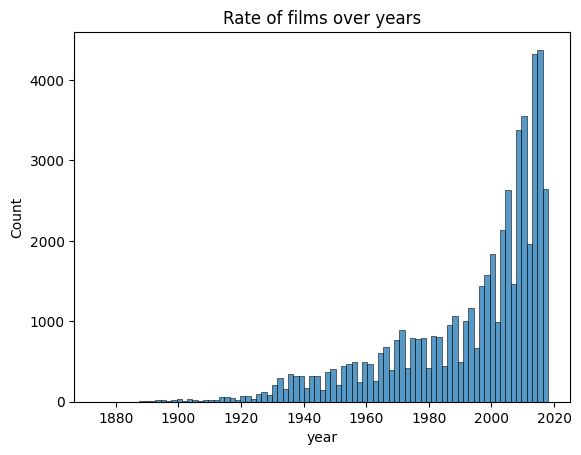

In [254]:
# using histplot to show the amount of films by year
sns.histplot(data= df_complete_movie, x = "year").set(title="Rate of films over years") 

b)

In [255]:
# creating a dataframe with top ten movies with highest ratings. 
top_ten_most_rate = df_complete_movie.sort_values(by=["Total ratings"], ascending=False, inplace=True)
top_ten_most_rate = df_complete_movie[:10]
top_ten_most_rate

,movieId,title,genres,year,av_rating,Total ratings
315,318,"Shawshank Redemption, The",Crime|Drama,1994,4.4,97999
352,356,Forrest Gump,Comedy|Drama|Romance|War,1994,4.1,97040
293,296,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994,4.2,92406
587,593,"Silence of the Lambs, The",Crime|Horror|Thriller,1991,4.2,87899
2487,2571,"Matrix, The",Action|Sci-Fi|Thriller,1999,4.1,84545
257,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Sci-Fi,1977,4.1,81815
476,480,Jurassic Park,Action|Adventure|Sci-Fi|Thriller,1993,3.7,76451
523,527,Schindler's List,Drama|War,1993,4.3,71516
108,110,Braveheart,Action|Drama|War,1995,4.0,68803
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,3.9,68469


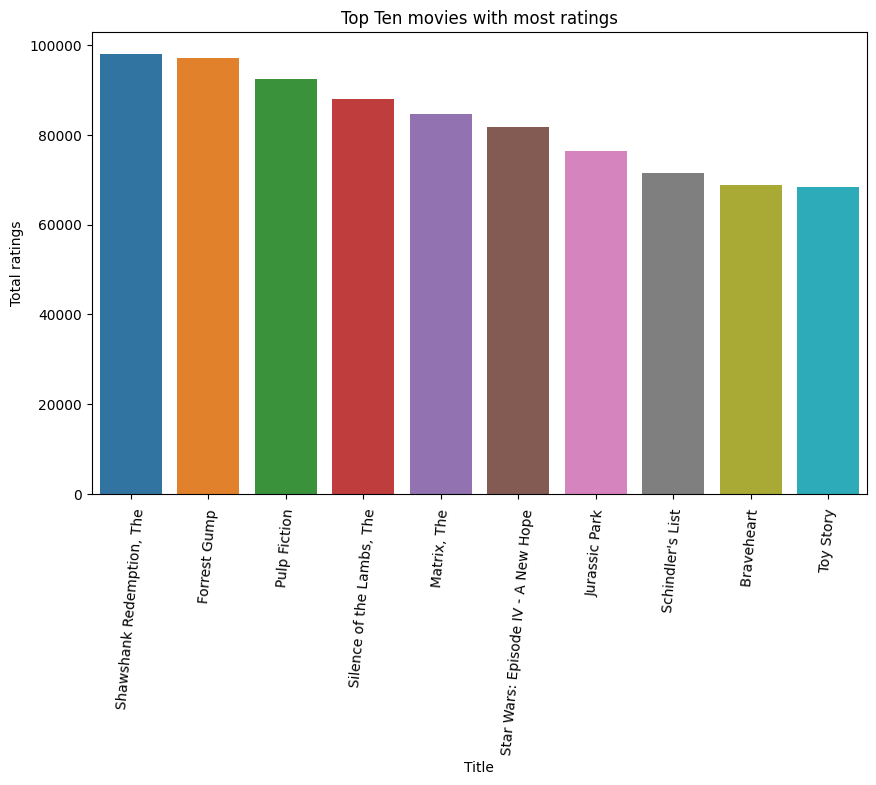

In [256]:
# plotting the top ten movies with most ratings 
fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.barplot(data=top_ten_most_rate, x="title", y="Total ratings")
ax.tick_params(axis='x', rotation=85)
ax.set(title="Top Ten movies with most ratings", xlabel="Title") 

plt.show();


c) I have answered this question within the dataframe beforehand. I decided to do a column of average rating for all the films in my dataset, so I was able to answer this question. here is the datframe again

In [257]:
top_ten_most_rate

,movieId,title,genres,year,av_rating,Total ratings
315,318,"Shawshank Redemption, The",Crime|Drama,1994,4.4,97999
352,356,Forrest Gump,Comedy|Drama|Romance|War,1994,4.1,97040
293,296,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994,4.2,92406
587,593,"Silence of the Lambs, The",Crime|Horror|Thriller,1991,4.2,87899
2487,2571,"Matrix, The",Action|Sci-Fi|Thriller,1999,4.1,84545
257,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Sci-Fi,1977,4.1,81815
476,480,Jurassic Park,Action|Adventure|Sci-Fi|Thriller,1993,3.7,76451
523,527,Schindler's List,Drama|War,1993,4.3,71516
108,110,Braveheart,Action|Drama|War,1995,4.0,68803
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,3.9,68469


d)

In [258]:
# The group by function groups the years then a count is done. Movie Id has the amount of counts represent the year
total_films_years = df_complete_movie.groupby(["year"]).count()
total_films_years.head()

,movieId,title,genres,av_rating,Total ratings
year,,,,,
1874,1,1,1,1,1
1878,1,1,1,1,1
1883,1,1,1,1,1
1887,1,1,1,1,1
1888,4,4,4,4,4


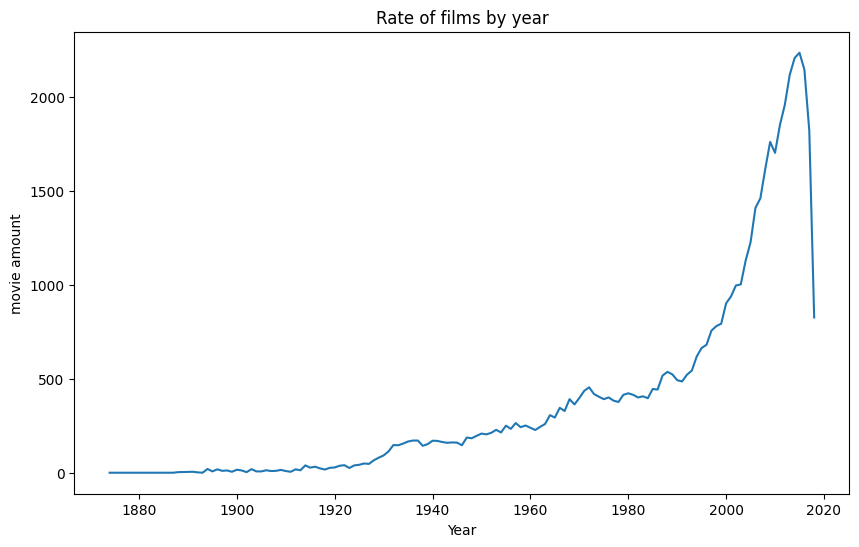

In [259]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.lineplot(data=total_films_years, x="year", y="movieId")
ax.set(title="Rate of films by year", xlabel="Year", ylabel= "movie amount") 

plt.show();

e)

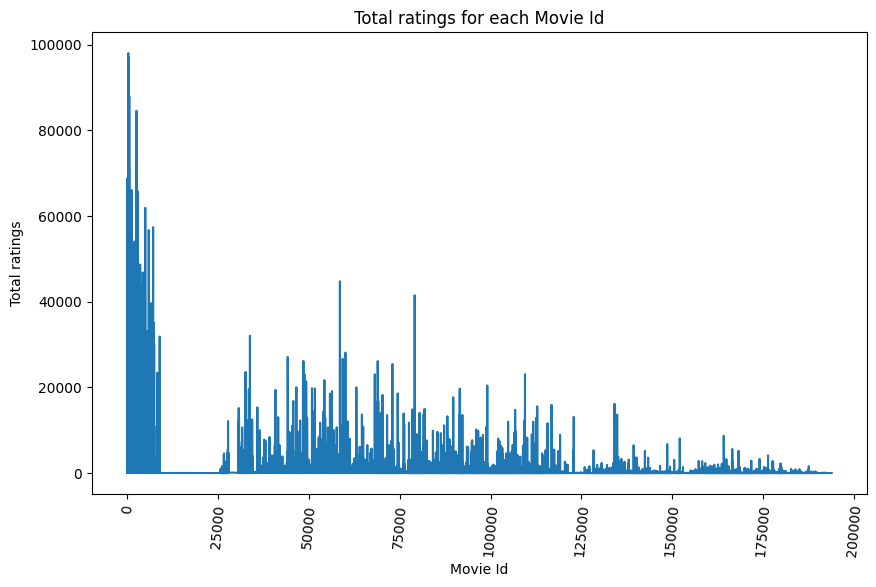

In [260]:
# I previously added a total ratings colum to the dataset so I could plot directly
fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.lineplot(data=df_complete_movie, x="movieId", y="Total ratings")
# rotating the labels
ax.tick_params(axis='x', rotation=85)
ax.set(title="Total ratings for each Movie Id", xlabel="Movie Id") 

plt.show();

f) 

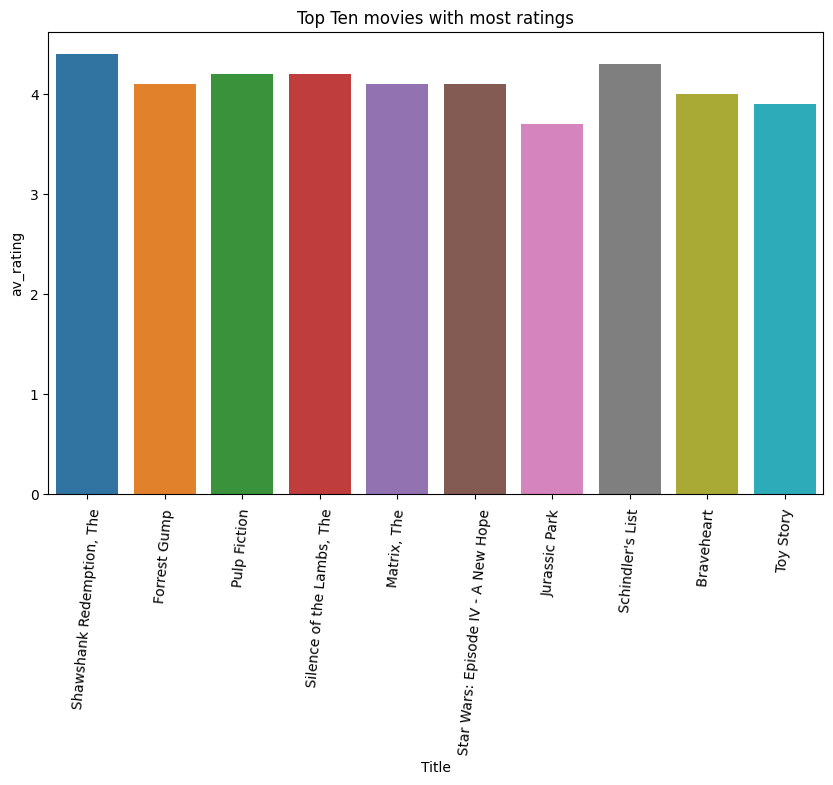

In [261]:
# creating a top ten movie barplot for average rating of top ten films
fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.barplot(data=top_ten_most_rate, x="title", y="av_rating")
ax.tick_params(axis='x', rotation=85)
ax.set(title="Top Ten movies with most ratings", xlabel="Title") 

plt.show();

## 1.2 Gles Matrix

I will now create a Gles matrix and try to filter my data. 
First I will clean up the ratings data frame to reduce the amount of the data

In [262]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [263]:
ratings = df_ratings_clean = df_ratings.drop(["timestamp"], axis=1) # removing the timestamp
ratings.head()

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5


In [264]:
amount_of_votes = ratings["userId"].value_counts()
amount_of_votes.head()


123100    23715
117490     9279
134596     8381
212343     7884
242683     7515
Name: userId, dtype: int64

#### Filtering my data set to make it smaller. I have decided to filter out users that have voted less then 5 times and users that have voted more than 500 times

In [265]:
def user_filter(min, max ):
    """ creates a min and max user rating amount to be used on data frame based on user ID"""
    df_filtered = ratings[ratings["userId"].map(ratings["userId"].value_counts()) > min] # Filter out user id that has less than 5 votes
    df_filtered = ratings[ratings["userId"].map(ratings["userId"].value_counts()) < max] # filters out user id that has voted more than 500 times
    return df_filtered


In [266]:
# creating the filtered dataset
filtered =  user_filter(5,500)
filtered

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5
...,...,...,...
27753439,283228,8542,4.5
27753440,283228,8712,4.5
27753441,283228,34405,4.5
27753442,283228,44761,4.5


In [267]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18385708 entries, 0 to 27753443
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int32  
 1   movieId  int32  
 2   rating   float32
dtypes: float32(1), int32(2)
memory usage: 350.7 MB


In [268]:
print(f"Original length was {len(ratings)} and the filtered length is now {len(filtered)}, that is a diffrence of {len(ratings)-len(filtered)}")

Original length was 27753444 and the filtered length is now 18385708, that is a diffrence of 9367736


I will test to see if it possible to be able to use this much data in my matrix. If i cannot then I will have to reduce the size again by another parameter

In [269]:
# importing pakages to be used with the model. KNN will be used and a sparse matrix 
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

In [270]:
filtered

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5
...,...,...,...
27753439,283228,8542,4.5
27753440,283228,8712,4.5
27753441,283228,34405,4.5
27753442,283228,44761,4.5


In [271]:
# checking to see if there is any missing values as the matrix will not work otherwise
missing_values = filtered[['movieId', 'userId']].isnull().sum()
print("Number of missing values:\n", missing_values)

Number of missing values:
 movieId    0
userId     0
dtype: int64


I tried the code that was in the code along warm up. However it did not like the amount of data that i passed

```
movies_users = df_ratings.pivot(index="movieId", columns="userId", values="rating").fillna(0)
mat_movies_users = csr_matrix(movies_users.values)
```

However Kevin in class had discovered a better and quicker piece of code that would provide a gless matrix. So I used this instead and it worked well. see below

In [272]:
# The categorical function is used to convert the columns into categorical variables and create a unique code for each value.

movies = pd.Categorical(filtered['movieId'],categories = df_movies['movieId']) # This solves the logical mistake, Thanks you Andreas for the help. 
users = pd.Categorical(filtered['userId'])
mat_movies_users = csr_matrix((filtered['rating'], (movies.codes, users.codes)))

In [273]:
# This is how the sparse matrix looks
print(mat_movies_users)

  (0, 8)	5.0
  (0, 12)	4.5
  (0, 13)	4.0
  (0, 20)	4.0
  (0, 23)	4.0
  (0, 25)	5.0
  (0, 29)	5.0
  (0, 30)	4.5
  (0, 36)	5.0
  (0, 40)	4.0
  (0, 41)	5.0
  (0, 49)	4.0
  (0, 52)	3.0
  (0, 53)	5.0
  (0, 55)	4.0
  (0, 59)	4.0
  (0, 64)	4.0
  (0, 67)	4.0
  (0, 68)	4.0
  (0, 70)	4.0
  (0, 71)	5.0
  (0, 76)	5.0
  (0, 95)	4.5
  (0, 102)	4.5
  (0, 106)	5.0
  :	:
  (58043, 211728)	3.5
  (58043, 258778)	4.0
  (58047, 174985)	0.5
  (58055, 183000)	2.5
  (58055, 240016)	1.5
  (58056, 208128)	4.0
  (58056, 256415)	5.0
  (58057, 208128)	4.0
  (58057, 256415)	5.0
  (58058, 208128)	1.5
  (58058, 256415)	5.0
  (58064, 205217)	3.0
  (58067, 174985)	0.5
  (58077, 4076)	4.0
  (58079, 174985)	0.5
  (58079, 241719)	3.0
  (58082, 57008)	3.5
  (58084, 29436)	3.0
  (58085, 1621)	3.0
  (58089, 133481)	4.5
  (58090, 207603)	3.0
  (58091, 224088)	4.0
  (58092, 174985)	5.0
  (58097, 198505)	2.5
  (58097, 218491)	4.0


## 2.1

In [274]:
# I will now create the model that will be used. It is a KNN model, selecting the 20 nearest neighbors
model_knn = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=5)

In [275]:
# Fitting the model to the dataframe
model_knn.fit(mat_movies_users)

NearestNeighbors(algorithm='brute', metric='cosine')

In [276]:
filtered

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5
...,...,...,...
27753439,283228,8542,4.5
27753440,283228,8712,4.5
27753441,283228,34405,4.5
27753442,283228,44761,4.5


In [277]:
# This is the code from the code along that is uses to create a movie recommendation 
def recommender(movie_name, data, model, n_recommendations) :
    idx = process.extractOne(movie_name, df_movies["title"])[2] 
    print("Movie Selected:" ,df_movies["title"][idx], "Index: ",idx ) 
    print("Searching for recommendations.....")
    distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations)

    for i in indices:
        print(df_movies["title"][i].where(i!=idx))

recommender("Toy story", mat_movies_users, model_knn,5)

Movie Selected: Toy Story  Index:  0
Searching for recommendations.....
0                                       NaN
767                       Independence Day 
257     Star Wars: Episode IV - A New Hope 
352                           Forrest Gump 
1242                    Back to the Future 
Name: title, dtype: object


In [281]:
recommender("Amityville", mat_movies_users, model_knn,5)

Movie Selected: Amityville -D  Index:  1294
Searching for recommendations.....
1294                               NaN
1297    Amityville II: The Possession 
1296     Amityville: A New Generation 
1295            Amityville: Dollhouse 
1293     Amityville : It's About Time 
Name: title, dtype: object


In [282]:
recommender("Superman", mat_movies_users, model_knn,5)

Movie Selected: Superman  Index:  2556
Searching for recommendations.....
2556                                 NaN
1343    Star Trek II: The Wrath of Khan 
2557                        Superman II 
2831                       Total Recall 
2900                            RoboCop 
Name: title, dtype: object


In [284]:
recommender("Iron man 3", mat_movies_users, model_knn,5)

Movie Selected: Iron Man  Index:  12666
Searching for recommendations.....
12666                  NaN
12559    Dark Knight, The 
17997       Avengers, The 
10186       Batman Begins 
13729           Star Trek 
Name: title, dtype: object


In [279]:
recommender("Lord of the rings", mat_movies_users, model_knn,5)

Movie Selected: Lord of the Rings, The  Index:  2033
Searching for recommendations.....
2033                   NaN
1938                 Dune 
2022                 Tron 
2057    Dark Crystal, The 
2883         Time Bandits 
Name: title, dtype: object


### a) 

The Function for the recomendation system works as follows: 
- Process.extractOne is a function from the fuzzywuzzy library. This is uses to find the closest match to the name that is searched within the column title.
- The index of that title is then extracted then assigned to the idx variable
- This index is then entered into the model which will then find the closest 5 neighbors, using KNN
- KNN uses a distance metric where it finds the distance from one point and then measures from that to all the other points in the data. It then chooses the closes point to the original point. 
- Then a loop is used to print the 5 closest matches from  the KNN algorithm. The where function excludes the original title name.   

#### b) 

There are many different types of recommender systems, but in general they fall within these 3 catagories:
- Collaborative filtering: This recommends to a user based on the preference of similar users. It looks at past behavior of the user and the similar users and recommends based on that.
- Content based filtering: This recommends based on the item they have previously liked. For example it may look at features such as genre, author or artist. Then it would recommend based on those features.
- Hybrid: These systems combine the two types above to create a more comprehensive system.
- Context filtering: Uses contextual user actions, plus the current context to predict the probability of the next action. 

With all this in mind many systems use a technique called Matrix factorization. This is when you break down a large matrix into smaller matrixes. The large matrix can represent user item interactions for example. The columns would be represent an item and then the rows would represent the user. Each cell would have a rating of the movie. 
This would be broken down into smaller matrixes for example one that represents users and their preference, the other movies and their characteristics. It then finds the best values in the smaller matrixes instead, while trying to recreate the bigger matrix as much as possible. This can be done using the least squared method.  


https://www.nvidia.com/en-us/glossary/data-science/recommendation-system/#:~:text=A%20recommendation%20system%20is%20an,demographic%20information%2C%20and%20other%20factors.

https://www.mygreatlearning.com/blog/matrix-factorization-explained/

There was a logical error that was to be solved within the code. Unfortunaly I could not solve it. However i think it has something to with this line: 
``` idx = process.extractOne(movie_name, df_movies["title"])[2] ```
 